# Feature Engineering & ARIMA model building

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("delhi_AQIclean.csv",header=0,index_col=0,parse_dates=True)

In [3]:
data.head()

,pm25
date,
2018-01-01 00:00:00,423.0
2018-01-01 01:00:00,414.0
2018-01-01 02:00:00,417.0
2018-01-01 03:00:00,466.0
2018-01-01 04:00:00,470.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2617 entries, 2018-01-01 00:00:00 to 2018-04-20 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm25    2617 non-null   float64
dtypes: float64(1)
memory usage: 40.9 KB


In [5]:
data_log=np.log(data)

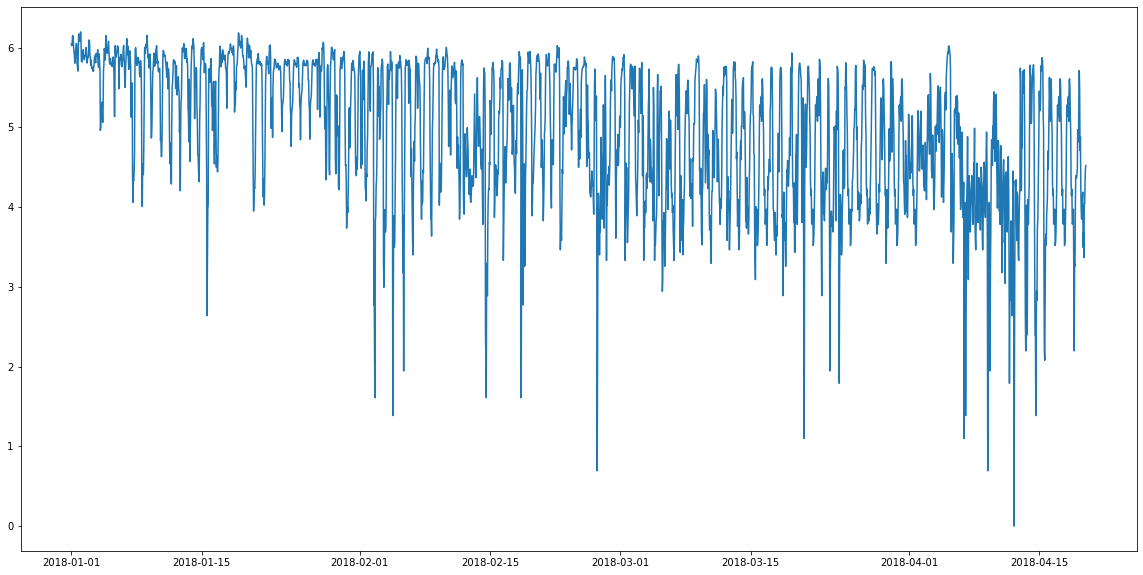

In [6]:
plt.figure(figsize=(20,10))
plt.plot(data_log)

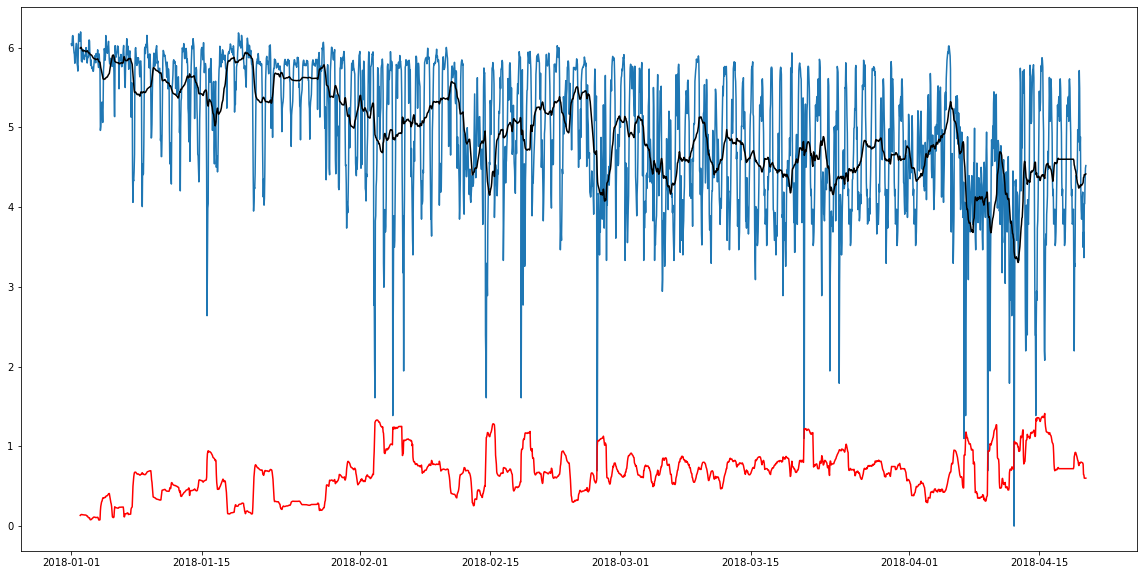

In [7]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=24).mean()
MStd=data_log.rolling(window=24).std()
plt.plot(data_log)
plt.plot(MAvg, color='black')
plt.plot(MStd,color='red')

In [8]:
MAvg

,pm25
date,
2018-01-01 00:00:00,NaN
2018-01-01 01:00:00,NaN
2018-01-01 02:00:00,NaN
2018-01-01 03:00:00,NaN
2018-01-01 04:00:00,NaN
...,...
2018-04-19 20:00:00,4.408053
2018-04-19 21:00:00,4.409542
2018-04-19 22:00:00,4.406335


In [9]:
data_log_diff=data_log-MAvg
data_log_diff

,pm25
date,
2018-01-01 00:00:00,NaN
2018-01-01 01:00:00,NaN
2018-01-01 02:00:00,NaN
2018-01-01 03:00:00,NaN
2018-01-01 04:00:00,NaN
...,...
2018-04-19 20:00:00,-0.365002
2018-04-19 21:00:00,-0.366490
2018-04-19 22:00:00,-0.088847


In [10]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,pm25
date,
2018-01-01 23:00:00,0.109253
2018-01-02 00:00:00,0.196642
2018-01-02 01:00:00,0.095380
2018-01-02 02:00:00,-0.164673
2018-01-02 03:00:00,-0.148854


In [13]:
from statsmodels.tsa.stattools import adfuller
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=24).mean()
    rolstd=timeseries.rolling(window=24).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['pm25'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

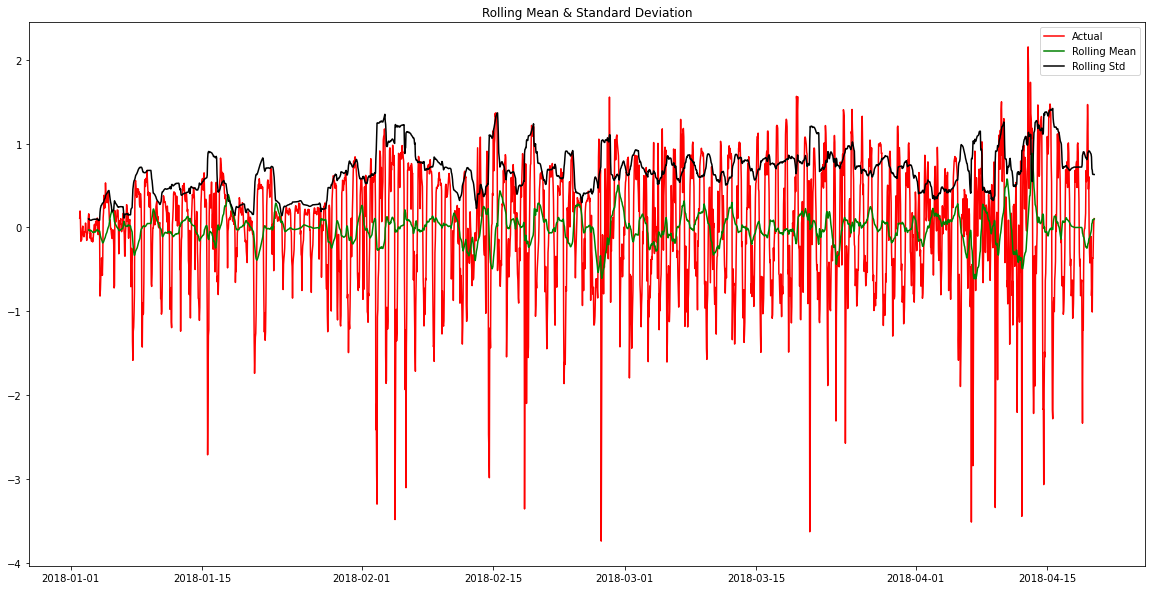

Dickey-Fuller Test: 
Test Statistic         -1.054154e+01
p-value                 8.624494e-19
Lags Used               2.800000e+01
No. of Obs              2.565000e+03
Critical Value (1%)    -3.432902e+00
Critical Value (5%)    -2.862667e+00
Critical Value (10%)   -2.567370e+00
dtype: float64


In [14]:
stationarity(data_log_diff)

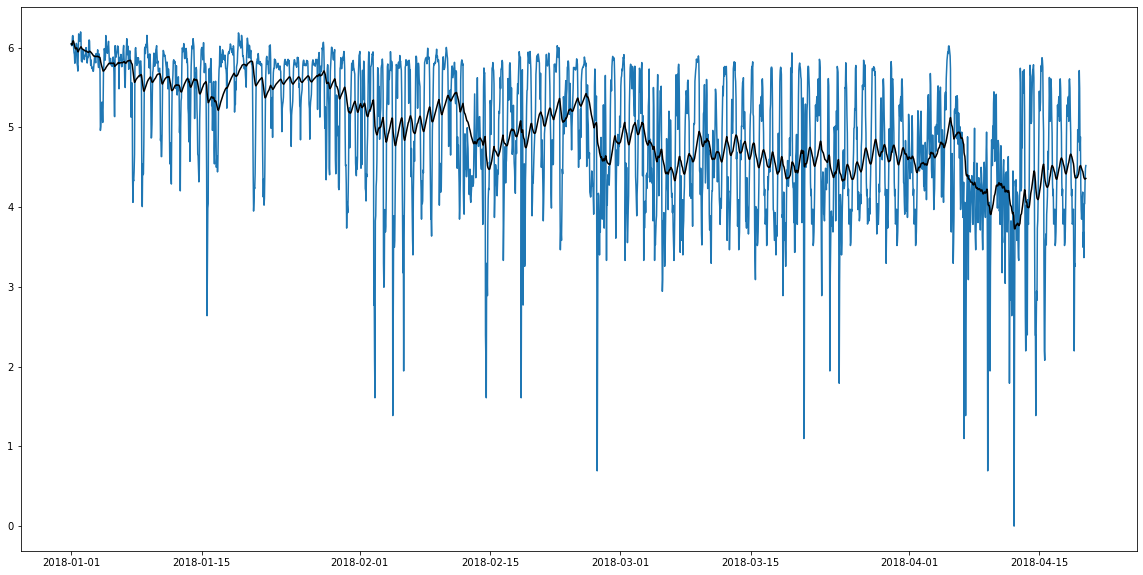

In [15]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=24, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

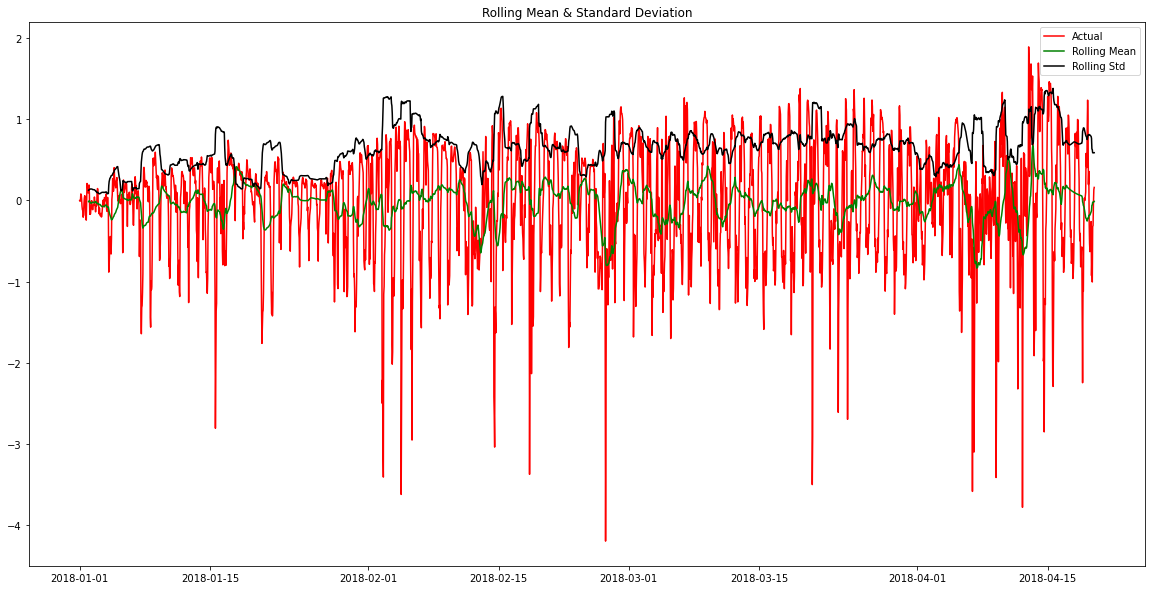

Dickey-Fuller Test: 
Test Statistic         -7.689054e+00
p-value                 1.435480e-11
Lags Used               2.800000e+01
No. of Obs              2.588000e+03
Critical Value (1%)    -3.432879e+00
Critical Value (5%)    -2.862657e+00
Critical Value (10%)   -2.567365e+00
dtype: float64


In [16]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

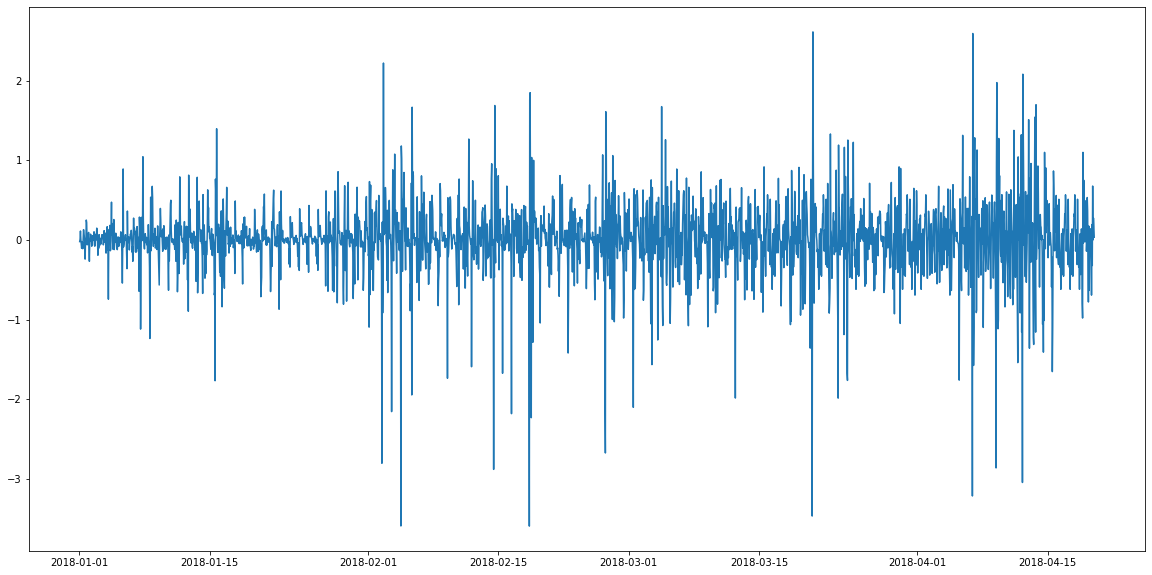

In [17]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

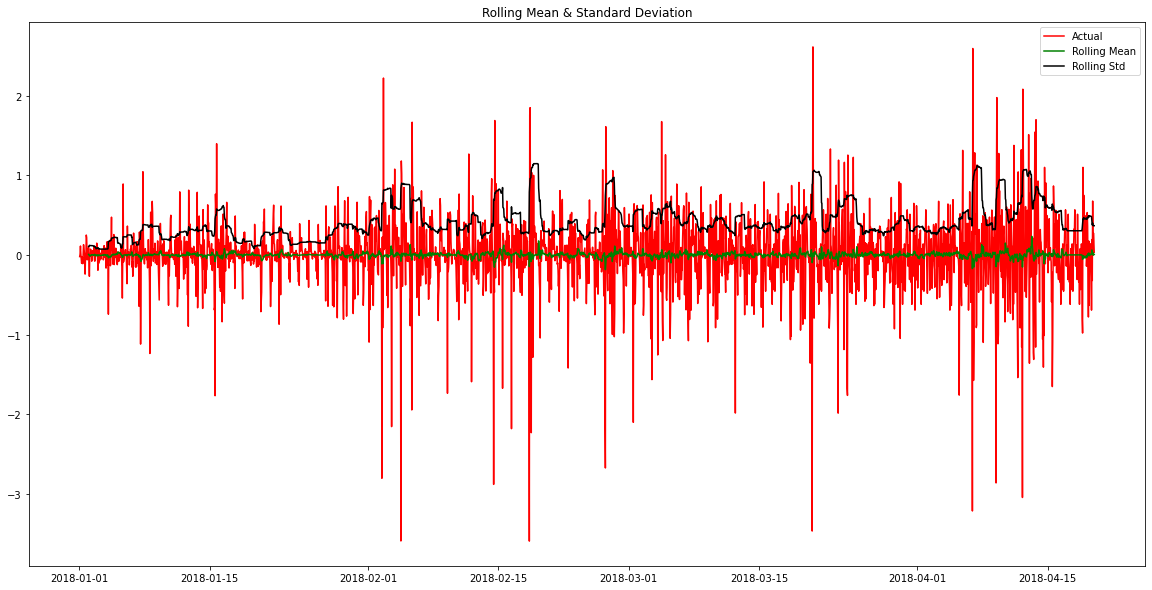

Dickey-Fuller Test: 
Test Statistic         -1.539199e+01
p-value                 3.300535e-28
Lags Used               2.800000e+01
No. of Obs              2.587000e+03
Critical Value (1%)    -3.432880e+00
Critical Value (5%)    -2.862658e+00
Critical Value (10%)   -2.567365e+00
dtype: float64


In [18]:
data_shift=data_shift.dropna()
stationarity(data_shift)

In [19]:
data_shift

,pm25
date,
2018-01-01 01:00:00,-0.021506
2018-01-01 02:00:00,0.007220
2018-01-01 03:00:00,0.111099
2018-01-01 04:00:00,0.008547
2018-01-01 05:00:00,-0.045710
...,...
2018-04-19 20:00:00,0.675755
2018-04-19 21:00:00,0.000000
2018-04-19 22:00:00,0.274437


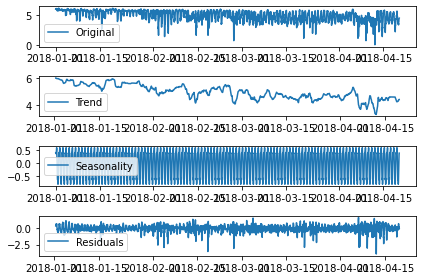

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Text(0.5, 1.0, 'Partial Autocorrelation Function')

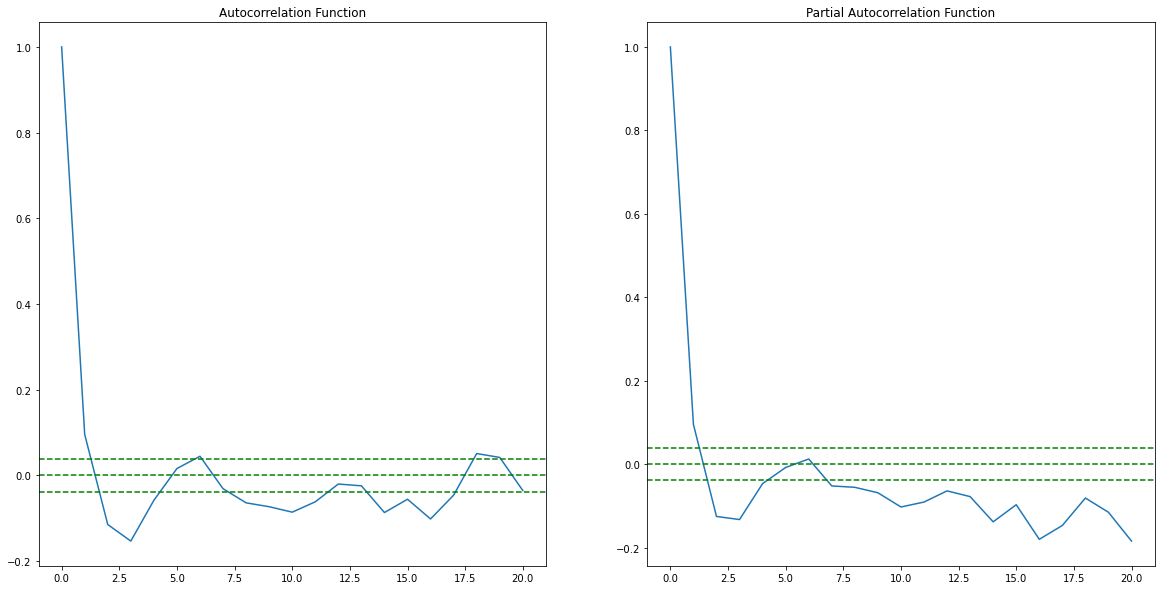

In [27]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

#plot ACF
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


plotting AR model


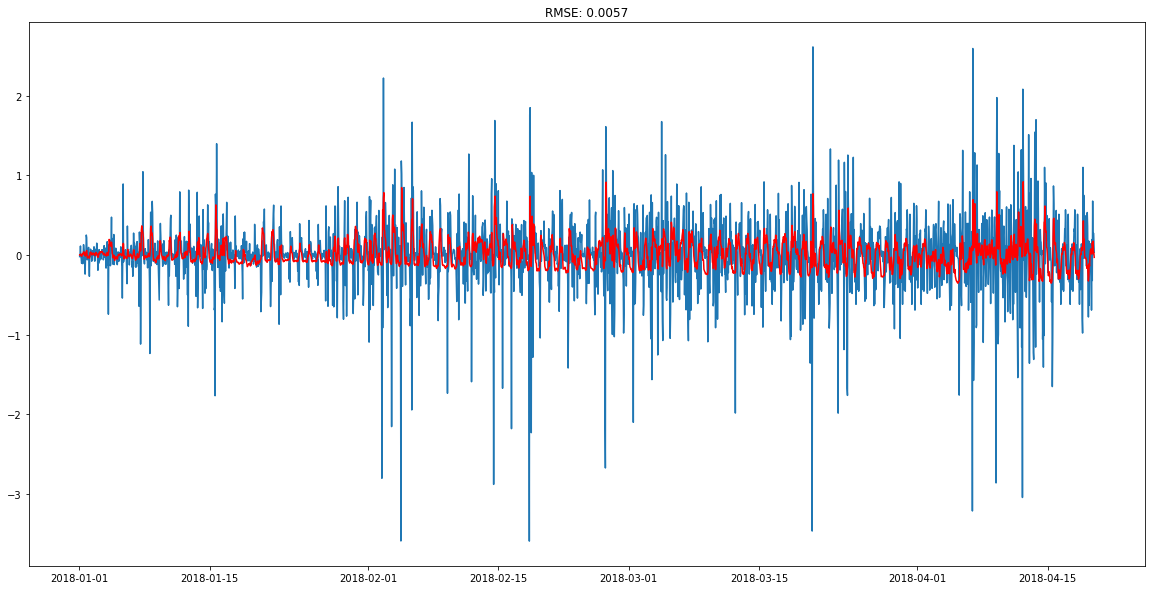

In [28]:
from statsmodels.tsa.arima_model import ARIMA

#plot AR model
plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results_AR=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_shift['pm25'])**2))
plt.title('RMSE: %.4f'% np.sqrt(np.mean(results_AR.fittedvalues-data_shift['pm25'])**2))
#plt.title('MAPE: %.4f'% np.mean(np.abs((results_AR.fittedvalues - data_shift['pm25'])/results_AR.fittedvalues))*100)
print('plotting AR model')

In [29]:
#('MAPE: %.4f'% np.mean(np.abs((results_AR.fittedvalues - data_shift['pm25'])/results_AR.fittedvalues))*100)

C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


plotting MA model


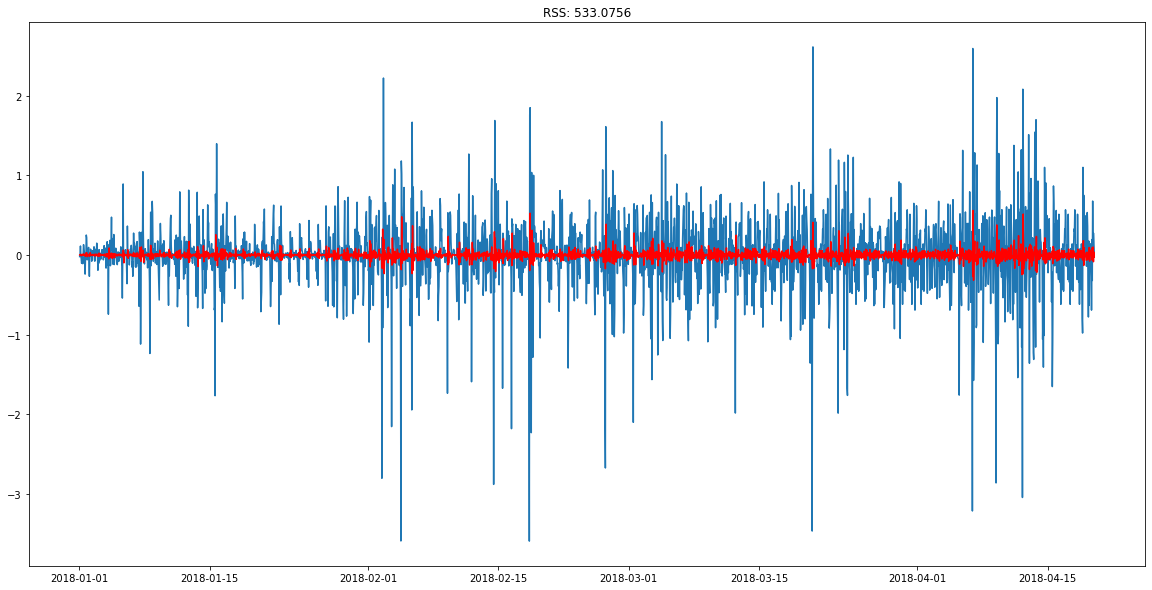

In [30]:
#plot MA model
plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-data_shift['pm25'])**2))
print('plotting MA model')

C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


plotting MA model


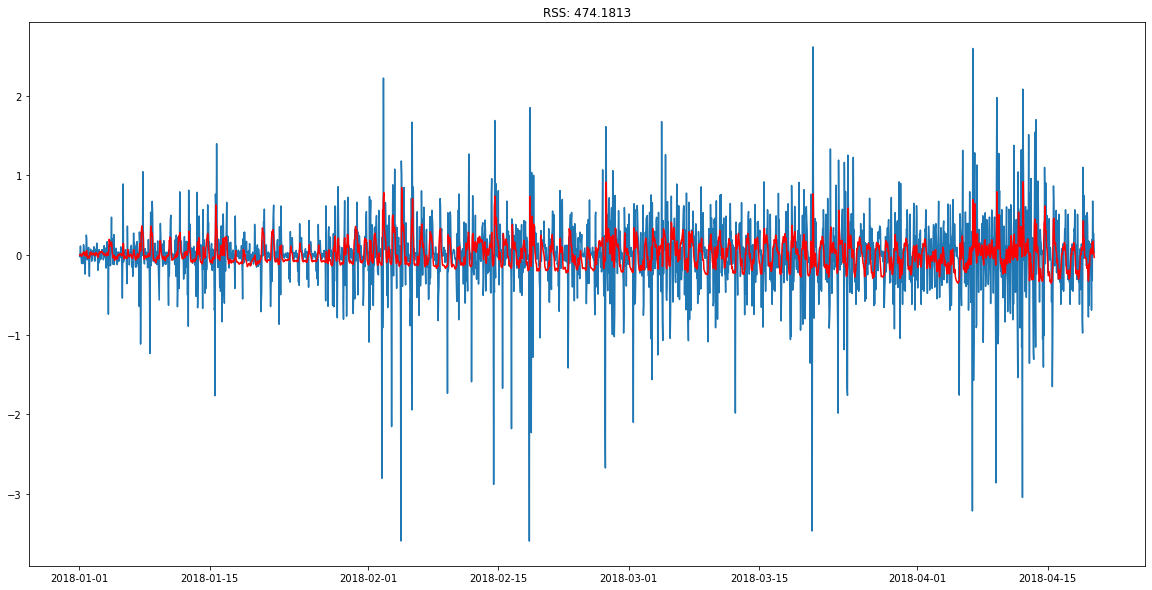

In [31]:
#plot ARIMA model
plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-data_shift['pm25'])**2))
print('plotting MA model')

In [32]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2018-01-01 01:00:00   -0.000585
2018-01-01 02:00:00   -0.002577
2018-01-01 03:00:00    0.002851
2018-01-01 04:00:00    0.011243
2018-01-01 05:00:00   -0.012390
dtype: float64


In [33]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2018-01-01 01:00:00   -0.000585
2018-01-01 02:00:00   -0.003163
2018-01-01 03:00:00   -0.000311
2018-01-01 04:00:00    0.010932
2018-01-01 05:00:00   -0.001458
dtype: float64


In [34]:
predictions_ARIMA_log=pd.Series(data_log['pm25'], index=data_log.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2018-01-01 00:00:00    6.047372
2018-01-01 01:00:00    6.025281
2018-01-01 02:00:00    6.029923
2018-01-01 03:00:00    6.143874
2018-01-01 04:00:00    6.163664
dtype: float64

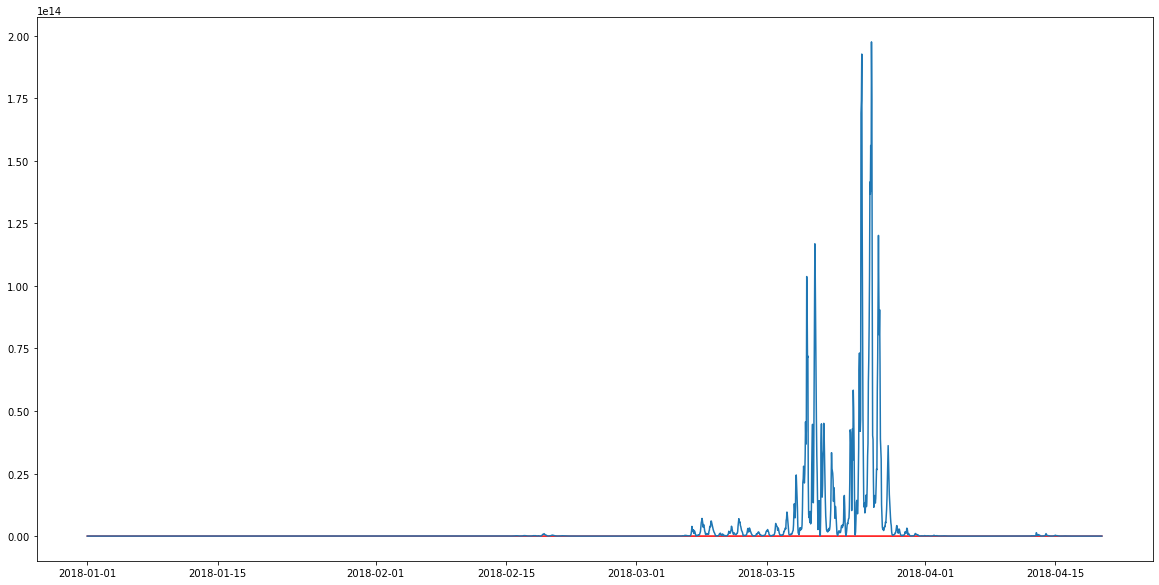

In [36]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.figure(figsize=(20,10))
plt.plot(data,  color='red')
plt.plot(predictions_ARIMA)

In [37]:
predictions_ARIMA

date
2018-01-01 00:00:00    4.230000e+02
2018-01-01 01:00:00    4.137577e+02
2018-01-01 02:00:00    4.156832e+02
2018-01-01 03:00:00    4.658549e+02
2018-01-01 04:00:00    4.751661e+02
                           ...     
2018-04-19 20:00:00    3.255314e+07
2018-04-19 21:00:00    3.865996e+07
2018-04-19 22:00:00    5.239737e+07
2018-04-19 23:00:00    6.397731e+07
2018-04-20 00:00:00    6.410796e+07
Length: 2617, dtype: float64

In [38]:
data_log.shape

(2617, 1)

(array([4.4554914]), array([0.42555249]), array([[3.62142385, 5.28955896]]))

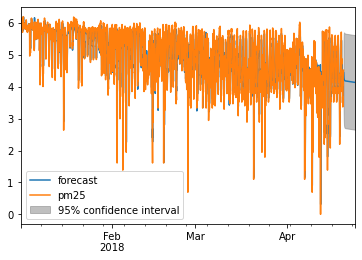

In [65]:
results_ARIMA.plot_predict(1,2713)
x=results_ARIMA.forecast()


C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


plotting AR model


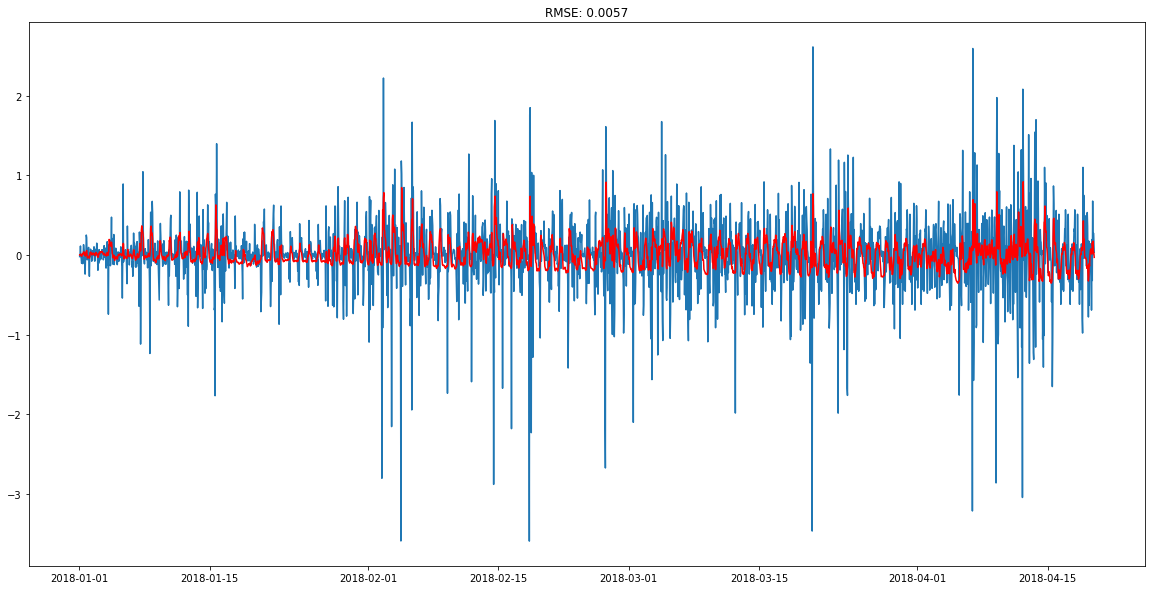

In [70]:



from statsmodels.tsa.arima_model import ARIMA

#plot AR model
plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results_AR=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_shift['pm25'])**2))
plt.title('RMSE: %.4f'% np.sqrt(np.mean(results_AR.fittedvalues-data_shift['pm25'])**2))
#plt.title('MAPE: %.4f'% np.mean(np.abs((results_AR.fittedvalues - data_shift['pm25'])/results_AR.fittedvalues))*100)
print('plotting ARIMA model')

In [72]:
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.pm25   No. Observations:                 2616
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1479.893
Method:                       css-mle   S.D. of innovations              0.426
Date:                Tue, 04 May 2021   AIC                           2971.787
Time:                        23:29:24   BIC                           3007.003
Sample:                    01-01-2018   HQIC                          2984.542
                         - 04-20-2018                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0006   5.03e-05    -11.630      0.000      -0.001      -0.000
ar.L1.D.pm25     0.9679      0.090     10.785      0.000       0.792       1.144
ar.L2.D.pm25    -0.1901      0.074     -2.556      0.011      -0.336      -0.044
ma.L1.D.pm25    -0.9814      0.091    -10.755      0.000      -1.160      -0.803
ma.L2.D.pm25    -0.0186      0.091     -0.204      0.839      -0.197       0.160
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4409           +0.0000j            1.4409            0.0000
AR.2            3.6505           +0.0000j            3.6505            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2          -53.7857           +0.0000j           53.7857            0.5000
-----------------------------------------------------------------------------
"""